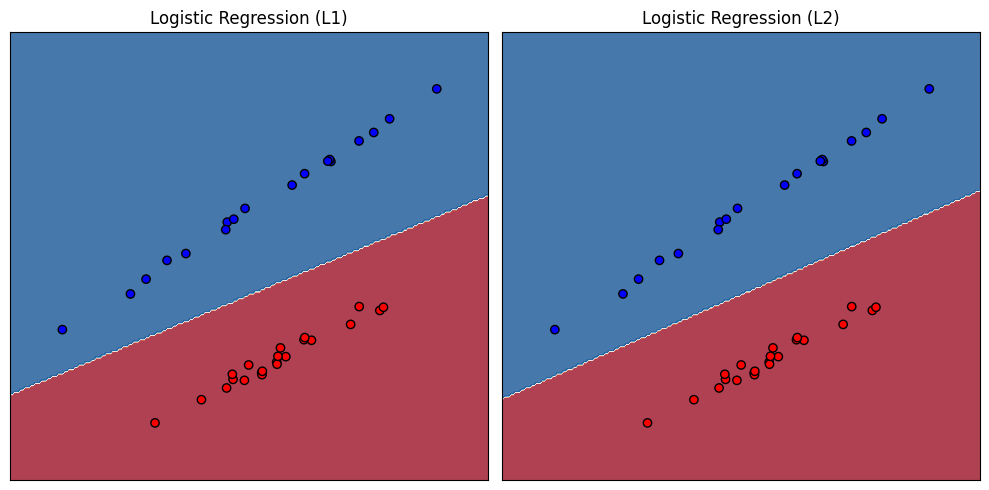

(array([[-1.79467639,  4.68933478]]), array([[-1.27538772,  3.18519242]]))

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap

# Generate a two-class dataset
X, y = make_classification(
    n_features=2,
    n_redundant=0,
    n_informative=2,
    n_clusters_per_class=1,
    random_state=42,
)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=42
)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Colors for plotting
cm_bright = ListedColormap(["#FF0000", "#0000FF"])
cm = plt.cm.RdBu


# Function to plot decision boundaries
def plot_decision_boundary(clf, X, y, ax, title):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, cmap=cm, alpha=0.8)
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright, edgecolors="k")
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)


# Train Logistic Regression models with L1 and L2 regularization
l1_clf = LogisticRegression(penalty="l1", C=1, solver="saga", random_state=42)
l2_clf = LogisticRegression(penalty="l2", C=1, solver="lbfgs", random_state=42)
l1_clf.fit(X_train, y_train)
l2_clf.fit(X_train, y_train)

# Plot decision boundaries
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
plot_decision_boundary(l1_clf, X_test, y_test, axes[0], "Logistic Regression (L1)")
plot_decision_boundary(l2_clf, X_test, y_test, axes[1], "Logistic Regression (L2)")

plt.tight_layout()
plt.show()

# Output beta coefficients
l1_coefs = l1_clf.coef_
l2_coefs = l2_clf.coef_
l1_coefs, l2_coefs

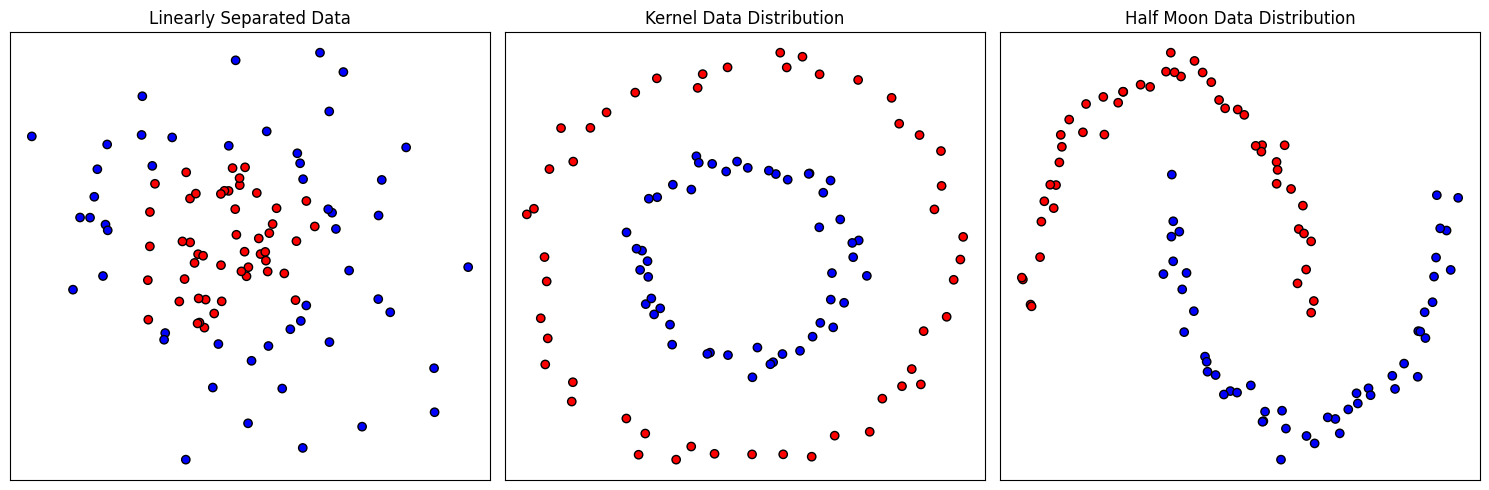

In [4]:
from sklearn.datasets import make_gaussian_quantiles, make_circles, make_moons

# Generate three datasets with different shapes

# 1. Mostly linearly separated data distribution
X1, y1 = make_gaussian_quantiles(
    cov=2.0, n_samples=100, n_features=2, n_classes=2, random_state=1
)

# 2. Kernel data distribution (circles)
X2, y2 = make_circles(n_samples=100, factor=0.5, noise=0.05, random_state=1)

# 3. Half moon data distribution
X3, y3 = make_moons(n_samples=100, noise=0.05, random_state=1)

# Plot the datasets
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Linearly separated data
axs[0].scatter(X1[:, 0], X1[:, 1], c=y1, cmap=cm_bright, edgecolors="k")
axs[0].set_title("Linearly Separated Data")

# Kernel data (circles)
axs[1].scatter(X2[:, 0], X2[:, 1], c=y2, cmap=cm_bright, edgecolors="k")
axs[1].set_title("Kernel Data Distribution")

# Half moon data
axs[2].scatter(X3[:, 0], X3[:, 1], c=y3, cmap=cm_bright, edgecolors="k")
axs[2].set_title("Half Moon Data Distribution")

# Set axis details
for ax in axs:
    ax.set_xticks(())
    ax.set_yticks(())

plt.tight_layout()
plt.show()

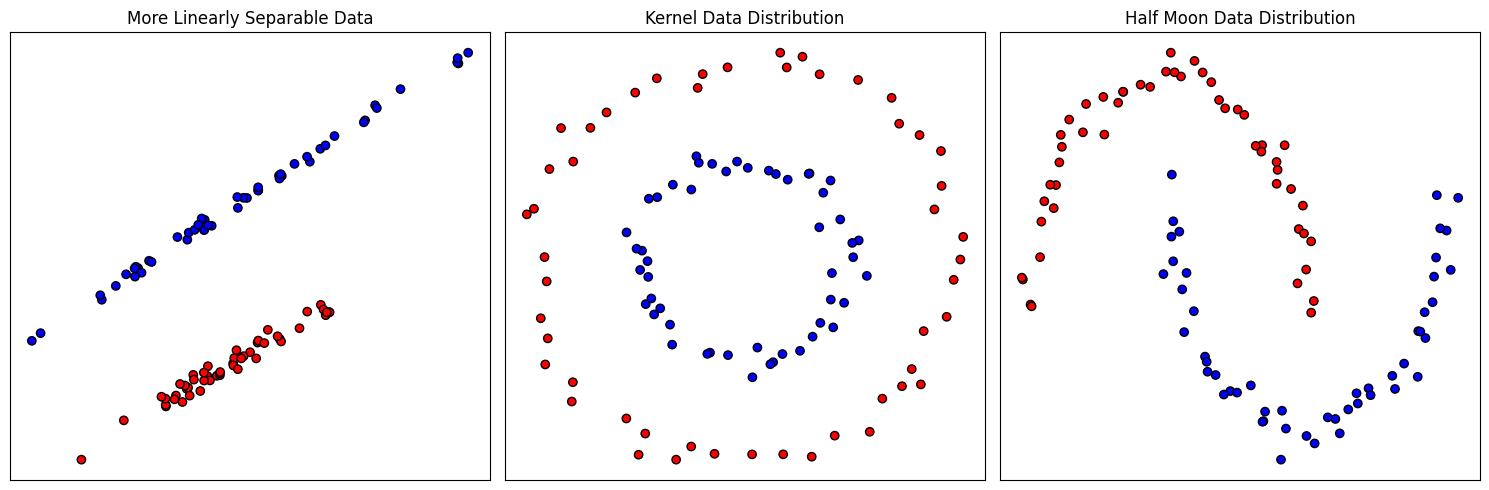

Linear (L1) - Coefficients (with l1 regularization): [[-1.79467639  4.68933478]]
Linear (L2) - Coefficients (with l2 regularization): [[-1.27538772  3.18519242]]
Circles (L1) - Coefficients (with l1 regularization): [[0. 0.]]
Circles (L2) - Coefficients (with l2 regularization): [[0.01919888 0.02246709]]
Moons (L1) - Coefficients (with l1 regularization): [[ 0.52042797 -2.47196521]]
Moons (L2) - Coefficients (with l2 regularization): [[ 0.59416492 -2.07321834]]


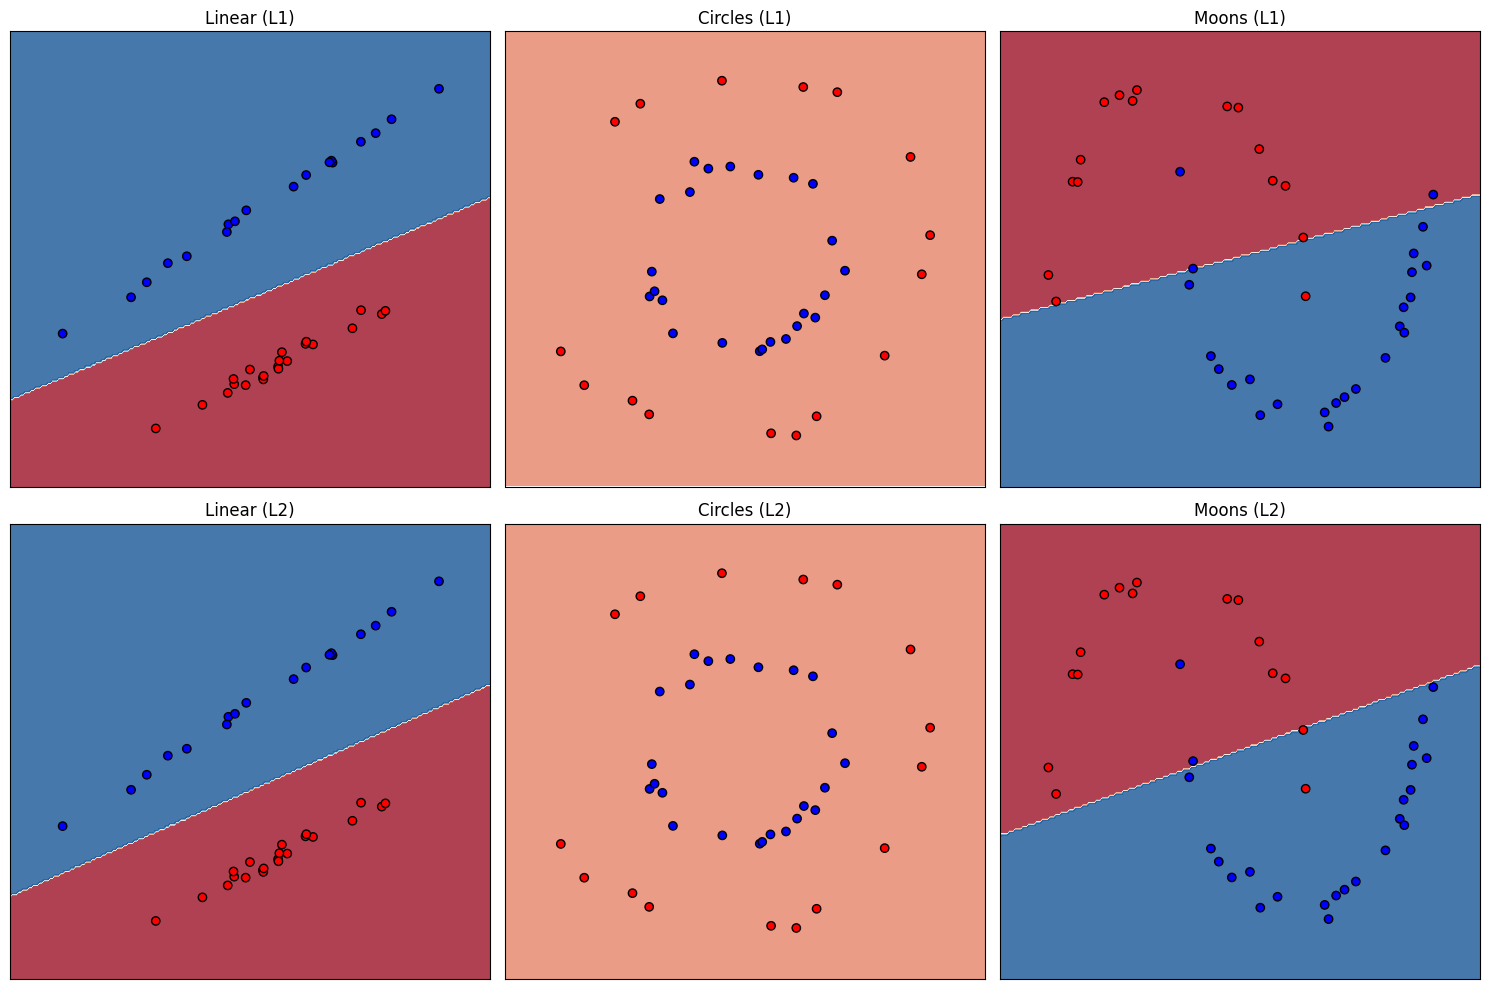